In [ ]:
# !git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

In [ ]:
# ! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_cuda9.0.txt | xargs -n 1 -L 1 pip install

In [ ]:
# !pip install efficientnet-pytorch tensorboardX

In [1]:
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [ ]:
from train_detector import Detector

In [ ]:
# pwd

In [ ]:
gtf = Detector();


In [ ]:
root_dir = ".";
coco_dir = "coco_dataset_3class";
img_dir = ".";
set_dir = "Images";

In [ ]:
gtf.Train_Dataset(root_dir, coco_dir, img_dir, set_dir, batch_size=8, image_size=512, use_gpu=True)

In [ ]:
gtf.Model();

In [ ]:
gtf.Set_Hyperparams(lr=0.0001, val_interval=1, es_min_delta=0.0, es_patience=0)

In [ ]:
gtf.Train(num_epochs=30, model_output_dir="trained/");

# Run Inference

In [2]:
from infer_detector import Infer

In [3]:
gtf = Infer();

In [4]:
gtf.Model(model_dir="trained/")

In [5]:
f = open("coco_dataset_3class/annotations/classes.txt", 'r');
class_list = f.readlines();
f.close();
for i in range(len(class_list)-1):
    class_list[i] = class_list[i][:-1]
class_list

['Helmet', 'Motorcycle', 'Person']

In [11]:
img_path = "test_images/person.jpg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.1);
print(scores)
print(labels)

tensor([0.3626, 0.2682, 0.2021, 0.1958, 0.1645, 0.1253, 0.1211, 0.1206, 0.1125,
        0.1123, 0.1091, 0.0972, 0.0961, 0.0863, 0.0857, 0.0853, 0.0842, 0.0820,
        0.0804, 0.0742, 0.0729, 0.0721, 0.0710, 0.0691, 0.0689, 0.0681, 0.0678,
        0.0663, 0.0594, 0.0589, 0.0582, 0.0577, 0.0576, 0.0571, 0.0562, 0.0560,
        0.0543, 0.0541, 0.0520, 0.0520], device='cuda:0')
tensor([2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2,
        2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1], device='cuda:0')


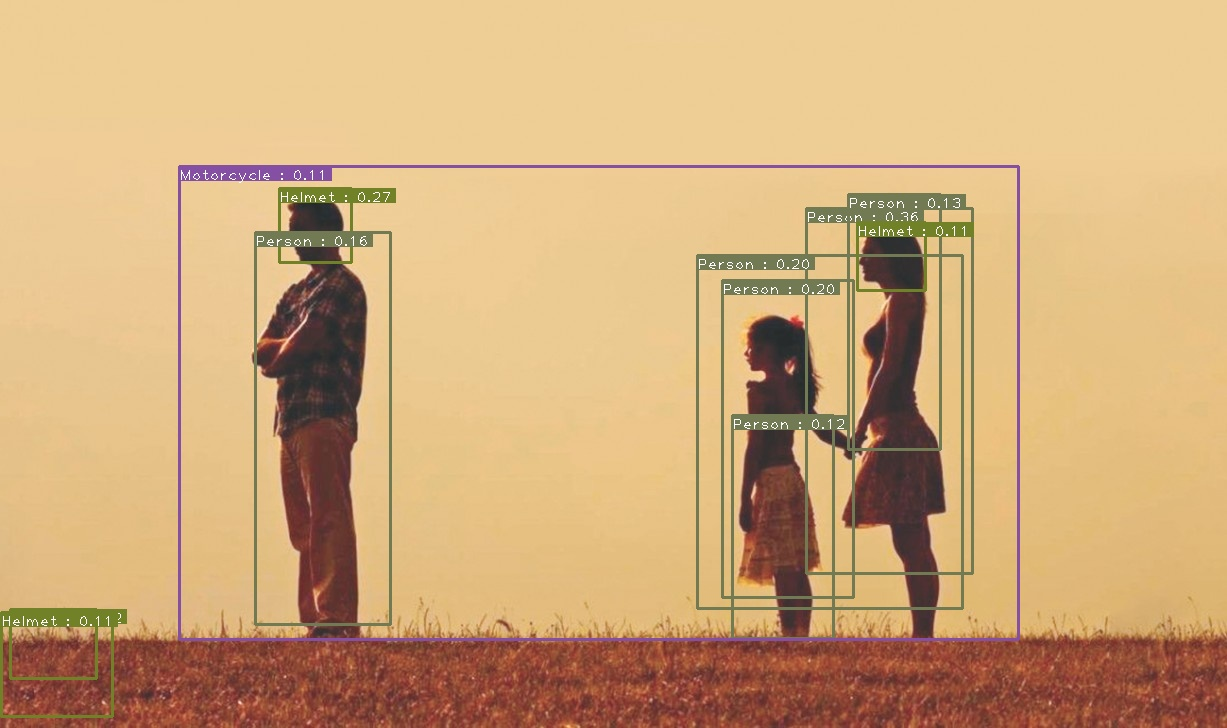

In [12]:
    from IPython.display import Image
    Image(filename='output.jpg') 